In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pickle as pkl


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'BMJUA_ttf'

In [2]:
analysisdata = pd.read_json('../data/getseedcorpdata.json')

In [3]:
analysisdata

,successMsg,data,success
products,success,"[{'id': 'PD00012796', 'name': '위글위글', 'logoImg...",True
similarCorps,success,"[{'corpId': 'CP00017523', 'bizNameKr': '커머스,패션...",True
mau,success,"{'recentUpdate': '2024-04-24', 'list': [{'prod...",True
customerSales,success,"{'recentUpdate': '2024-04-24', 'salesBasic': [...",True
customerType,success,"{'recentUpdate': '2024-04-24', 'salesPerson': ...",True
investment,success,"{'recentUpdate': '2022-10-04', 'lastInvestment...",True
organization,success,"{'recentUpdate': '2024-04-24', 'retireRate': 3...",True
dataSufficient,success,True,True


## MAU

In [4]:
df_mau = pd.DataFrame(analysisdata['data']['mau']['list'][0]['data'])

In [5]:
df_mau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   referenceMonth  25 non-null     object 
 1   value           25 non-null     int64  
 2   growthRate      24 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes


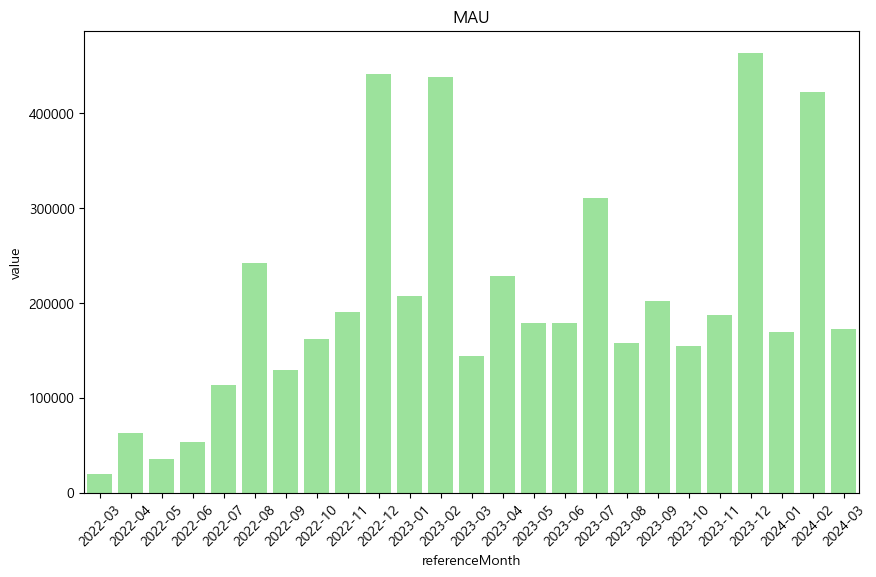

In [6]:
plt.figure(figsize=(10, 6))

# 추세선을 평균으로 설정하여 barplot 생성
sns.barplot(data=df_mau, x='referenceMonth', y='value', color='lightgreen', estimator=np.mean)

plt.title('MAU')
plt.xticks(rotation=45)
plt.show()


## 판매실적

In [7]:
df_salesBasic = pd.DataFrame(analysisdata['data']['customerSales']['salesBasic'])

In [8]:
df_salesBasic['inCome'] = df_salesBasic['count']*df_salesBasic['unitPrice']

In [9]:
df_salesBasic.sort_values('count')

,referenceMonth,rate,count,unitPrice,inCome
4,2022-01,0.3,316,32367.2,1.022804e+07
0,2021-09,0.3,318,30934.3,9.837107e+06
1,2021-10,0.8,629,34612.2,2.177107e+07
2,2021-11,1.6,918,45875.7,4.211389e+07
3,2021-12,1.3,940,36883.1,3.467011e+07
6,2022-03,4.5,3419,34261.0,1.171384e+08
7,2022-04,5.2,4602,29888.2,1.375455e+08
8,2022-05,7.3,5531,34461.2,1.906049e+08
9,2022-06,12.1,7469,42198.2,3.151784e+08
10,2022-07,14.0,7922,45977.9,3.642369e+08


In [10]:
with open("../data/pickles/df_salesBasic.pkl", "wb") as f:
    pkl.dump(df_salesBasic, f)

### 판매 건수

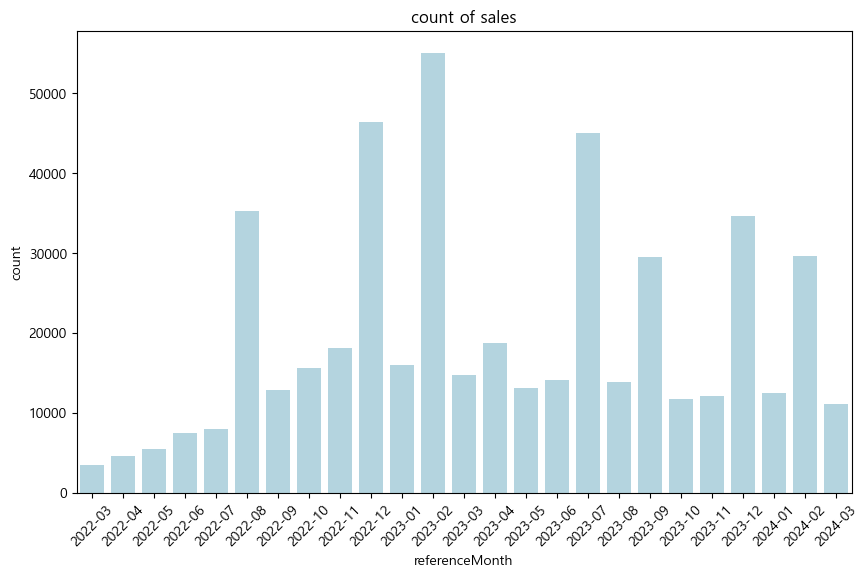

In [77]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='count',color='lightblue')

plt.title('count of sales')
plt.xticks(rotation=45)
plt.show()

### 평균 가격

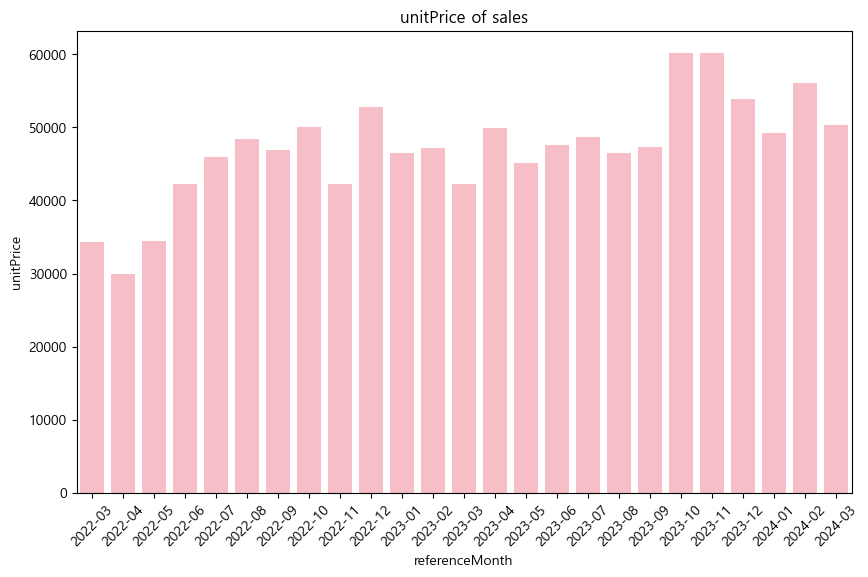

In [93]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='unitPrice',color='lightpink')

plt.title('unitPrice of sales')
plt.xticks(rotation=45)
plt.show()

### 매출

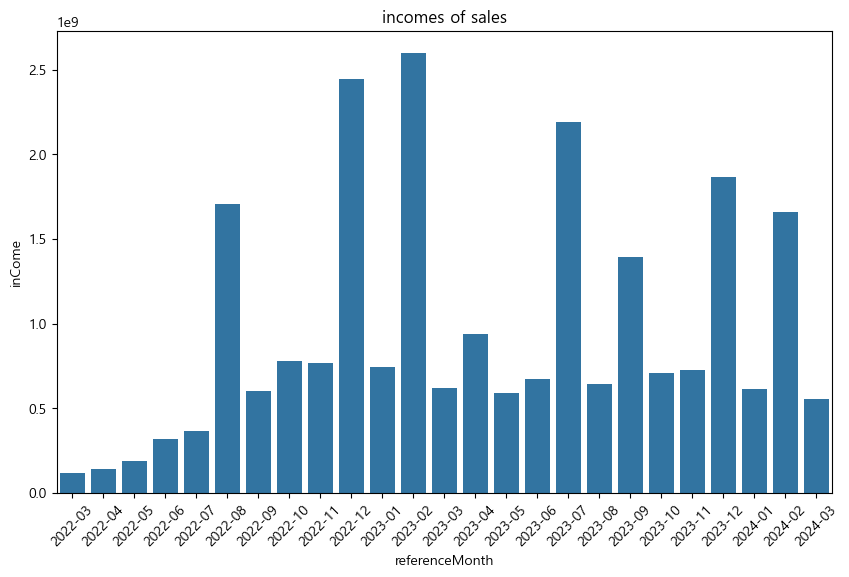

In [94]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='inCome')

plt.title('incomes of sales')
plt.xticks(rotation=45)
plt.show()

## 재구매율

In [53]:
df_salesPeriod = pd.DataFrame(analysisdata['data']['customerSales']['salesPeriod'])

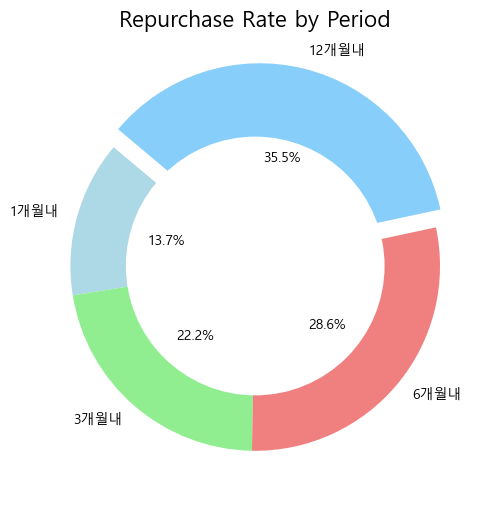

In [63]:

# 데이터
sizes = df_salesPeriod['repurchaseRate']
labels = df_salesPeriod['period']
explode = (0, 0, 0, 0.1)  # 특정 부분을 강조하기 위해 폭발 효과 사용

# 원 그래프 그리기
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140,pctdistance=0.5, colors=colors)

# 중심에 원을 그려서 원 그래프가 원 모양을 유지하도록 함
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 제목 추가
plt.title('Repurchase Rate by Period', fontsize=16)

# 그래프 보이기
plt.show()

In [96]:
df_salesPeriod['avgPurchaseRate']

0    1.4
1    1.6
2    1.9
3    2.3
Name: avgPurchaseRate, dtype: float64

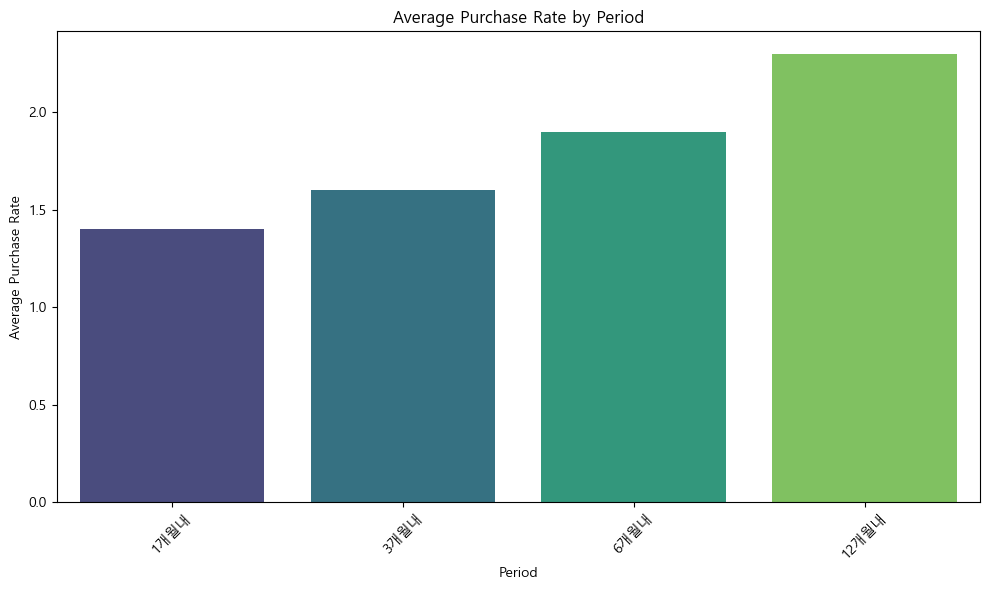

In [100]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesPeriod, x='period', y='avgPurchaseRate', palette='viridis')

plt.title('Average Purchase Rate by Period')
plt.xlabel('Period')
plt.ylabel('Average Purchase Rate')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## 소비자 유형

In [67]:
df_salesPerson = pd.DataFrame(analysisdata['data']['customerType']['salesPerson'])
df_salesFamily = pd.DataFrame(analysisdata['data']['customerType']['salesFamily'])
df_salesIncome = pd.DataFrame(analysisdata['data']['customerType']['salesIncome'])

### 성별 및 연령

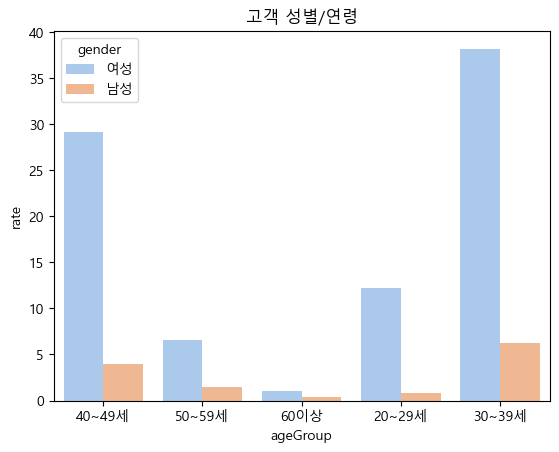

In [69]:
sns.barplot(data=df_salesPerson, x='ageGroup', y='rate', hue='gender', palette='pastel')

plt.title('고객 성별/연령')
plt.show()

### 가족구성 및 소득

In [70]:
df_salesIncome

,type,rate
0,2000만원이하,1.0
1,3000만원이하,13.6
2,4000만원이하,22.7
3,5000만원이하,22.1
4,6000만원이하,16.6
5,8000만원이하,12.9
6,1억원이하,4.8
7,1억원초과,6.3


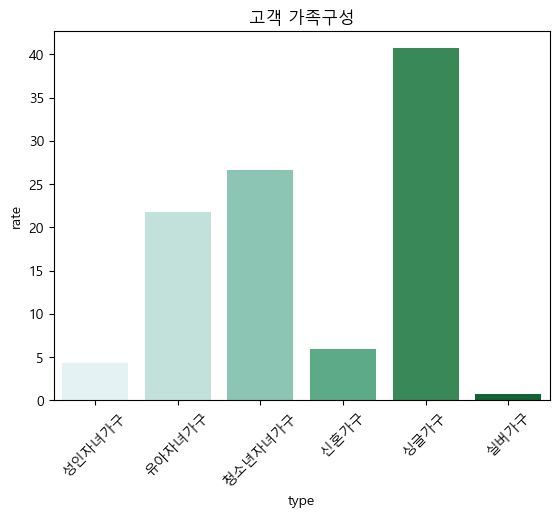

In [73]:
sns.barplot(data=df_salesFamily, x='type', y='rate', palette='BuGn')

plt.xticks(rotation=45)
plt.title('고객 가족구성')
plt.show()


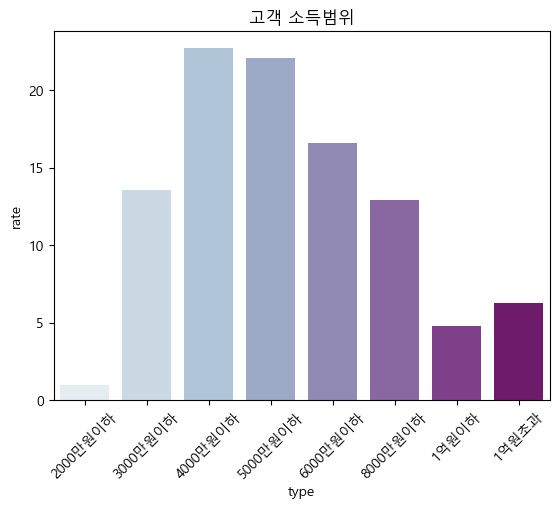

In [74]:
sns.barplot(data=df_salesIncome, x='type', y='rate',palette='BuPu')

plt.xticks(rotation=45)
plt.title('고객 소득범위')
plt.show()
